### 회귀 - 당뇨병
- 회귀에서는 출력층(Dense)에 활성화 함수를 사용하지 않음
- 회귀 실행(compile)시에는 metrics=['accuracy']  사용하지 않음. loss = 'mean_squared_error'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=seed    # stratify는 categorical target에만 적용
)

In [18]:
del model

- 모델 정의/설정/학습/평가

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# Dense 배수 및 약수 설정 X
model = Sequential([
    Dense(24, input_dim=10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)                # "회귀에서는 출력층에 활성화 함수를 사용하지 않음."
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 24)                264       
                                                                 
 dense_4 (Dense)             (None, 10)                250       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 525 (2.05 KB)
Trainable params: 525 (2.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# 회귀 실행시에는 metrics=['accuracy']  사용하지 않음. "mean_squared_error"
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [22]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=1000, batch_size=100, verbose=2)

Epoch 1/1000


3/3 - 1s - loss: 28742.2480 - val_loss: 30237.0879 - 795ms/epoch - 265ms/step
Epoch 2/1000
3/3 - 0s - loss: 28732.9121 - val_loss: 30227.5312 - 33ms/epoch - 11ms/step
Epoch 3/1000
3/3 - 0s - loss: 28724.0859 - val_loss: 30218.0703 - 35ms/epoch - 12ms/step
Epoch 4/1000
3/3 - 0s - loss: 28715.3086 - val_loss: 30208.8340 - 36ms/epoch - 12ms/step
Epoch 5/1000
3/3 - 0s - loss: 28706.4473 - val_loss: 30199.6270 - 36ms/epoch - 12ms/step
Epoch 6/1000
3/3 - 0s - loss: 28697.8086 - val_loss: 30190.5352 - 34ms/epoch - 11ms/step
Epoch 7/1000
3/3 - 0s - loss: 28689.3203 - val_loss: 30181.4473 - 34ms/epoch - 11ms/step
Epoch 8/1000
3/3 - 0s - loss: 28680.7559 - val_loss: 30172.2324 - 36ms/epoch - 12ms/step
Epoch 9/1000
3/3 - 0s - loss: 28672.0742 - val_loss: 30162.8027 - 34ms/epoch - 11ms/step
Epoch 10/1000
3/3 - 0s - loss: 28663.1660 - val_loss: 30153.1270 - 30ms/epoch - 10ms/step
Epoch 11/1000
3/3 - 0s - loss: 28654.0137 - val_loss: 30143.2246 - 32ms/epoch - 11ms/step
Epoch 12/1000
3/3 - 0s - loss:

In [23]:
# 평가
pred = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.49863264591962764

In [25]:
import pandas as pd
df = pd.DataFrame({'y_test':y_test, 'pred':pred.flatten()})
df.head()

,y_test,pred
0,265.0,157.926422
1,261.0,233.828796
2,160.0,106.060410
3,249.0,204.552231
4,102.0,105.654358


- 학습과정 시각화

In [26]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

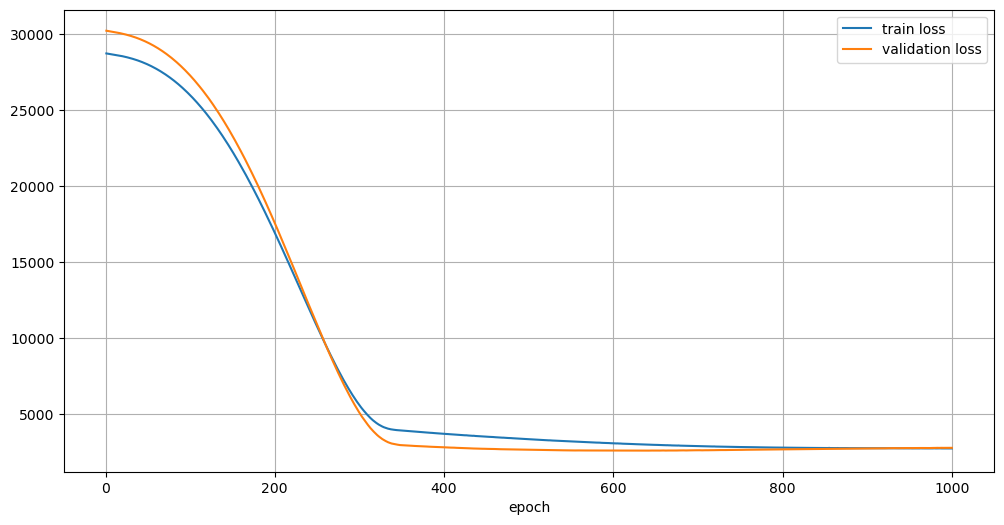

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()
# 학습을 370번 정도 해야지 안정적